# Basic Edge Detection
A basic step-by step walkthrough on Basic Edge Detection using OpenCV and Python3

<sub><sup>By Teguh Satya Dharma __(Kalehub)__</sub></sup>

<hr>

## Tools and Modules
To build the project on your own, you're gonna need some tools and library installed in your computer:
* [Python3] (https://www.python.org/downloads/)
* Virtual environment
* Open CV, Numpy, and matplotlib modules
* Jupyterlab

<hr>

# Importing the libraries
In this project we're going to use OpenCV for image processing in Python, Numpy to deals with array
and matplotlib to display plot (or image in this case)

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read the image as a gray image
To begin the project, we are going to need an image. The image is located in "DATA" directory
and we need to change the color into grayscale.

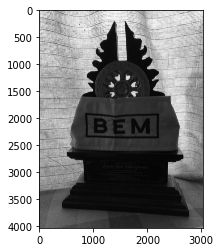

In [78]:
img = cv2.imread('DATA/plakat.jpg',0)
plt.imshow(img, "gray")

# Resizing the image
Looks like our computer is dealing with such a large image. To tackle that, we can resize the image
using OpenCV resize method.

In [79]:
# Resizing the image to make it 30% smaller
w = int(img.shape[1]*0.3)
h = int(img.shape[0]*0.3)
resized_img = cv2.resize(img, (w,h), interpolation = cv2.INTER_AREA)

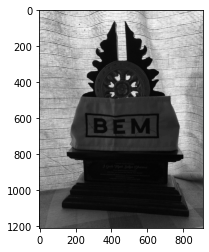

In [80]:
plt.imshow(resized_img, cmap="gray")

In [81]:
# original image shape
img.shape

(4032, 3024)

In [82]:
# resized image shape
resized_img.shape

(1209, 907)

__The image is successfully resized!__

# Showing image
Using the builtin imshow method, we can hardly see the picture. To get a clearer perspective toward
our project, let's define our own show_img function, so that we can see the picture better!

In [83]:
def show_img(img):
    fig = plt.figure(figsize=(10,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, 'gray')

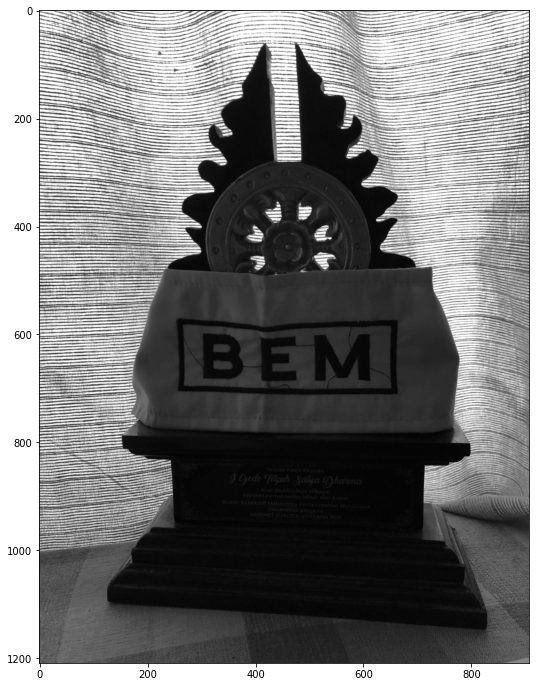

In [84]:
show_img(resized_img)

# Removing Noise with Blurring
To denoise an image, we can use several methods. But in this project we are going to use blurring.
There is a lot of way to blur an image in OpenCV, you can make your own kernel then apply them,
default blurring, Gaussian, Median, etc.

In this project we are going to use the median blurring

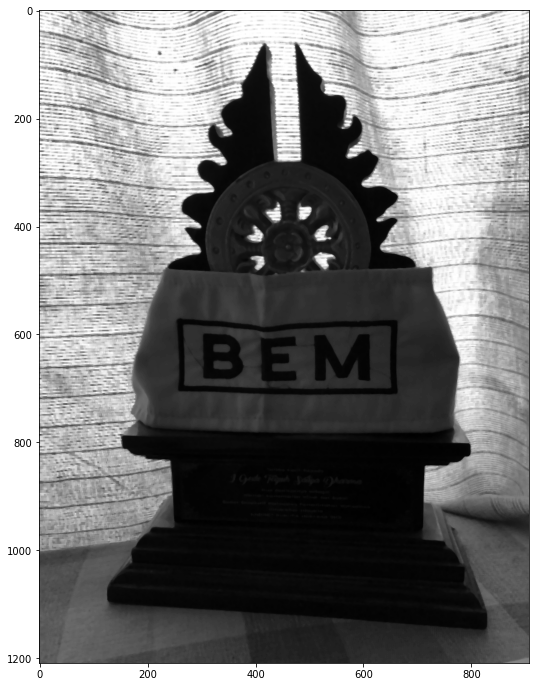

In [85]:
resized_img = cv2.medianBlur(resized_img, 5)
show_img(resized_img)

# Applying sobel filters
This is where the fun begins!

The Sobel operator, sometimes called the Sobelâ€“Feldman operator or Sobel filter, is used in image processing and computer vision, particularly within edge detection algorithms where it creates an image emphasising edges. It is named after Irwin Sobel and Gary Feldman, colleagues at the Stanford Artificial Intelligence Laboratory (SAIL)

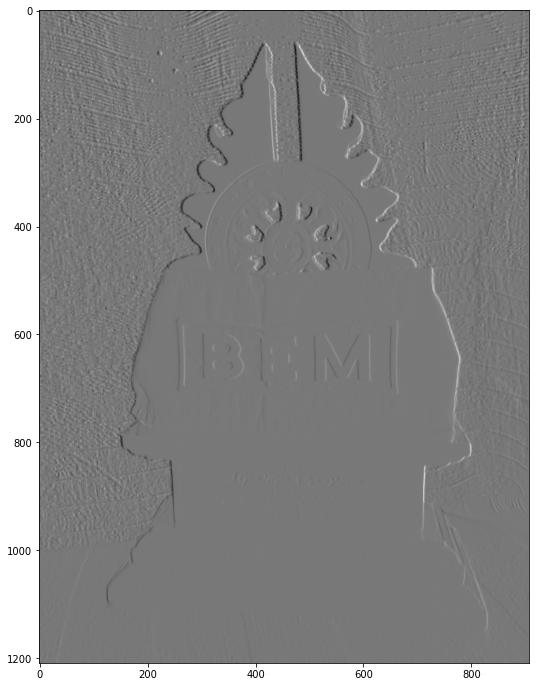

In [86]:
# Setting the X value
gradX = cv2.Sobel(resized_img, cv2.CV_64F, 1, 0, 10)
show_img(gradX)

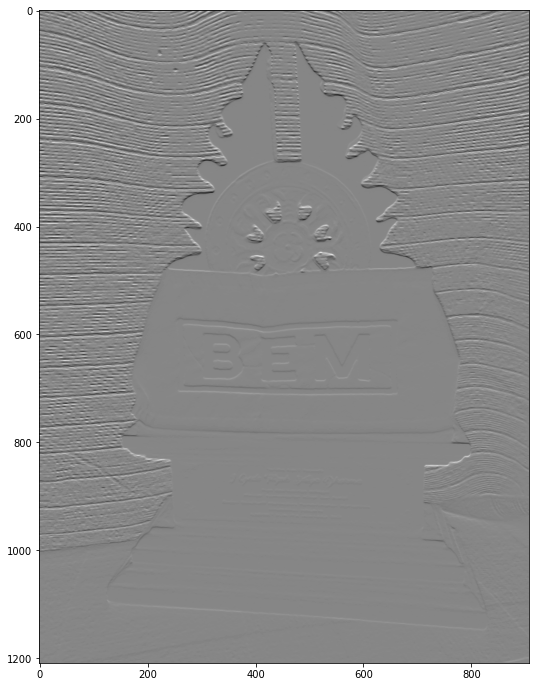

In [87]:
# Setting the Y value
gradY = cv2.Sobel(resized_img, cv2.CV_64F, 0, 1, 10)
show_img(gradY)

In [88]:
# Getting absolute scale
abs_grad_x = cv2.convertScaleAbs(gradX)
abs_grad_y = cv2.convertScaleAbs(gradY)

In [89]:
# Combining the X and the Y
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

True

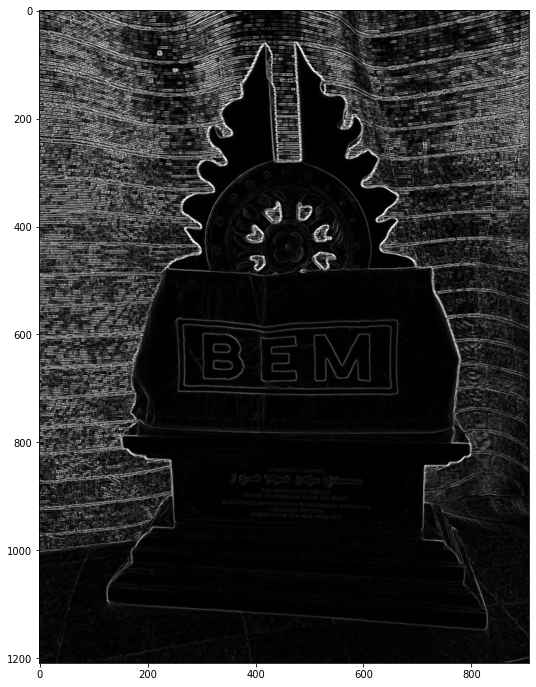

In [90]:
show_img(grad)
cv2.imwrite('edges.jpg', grad)

# Done!
Your computer successfully detected an edge!